In [1]:
!pip install chess

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.1/149.1 kB 2.8 MB/s eta 0:00:00


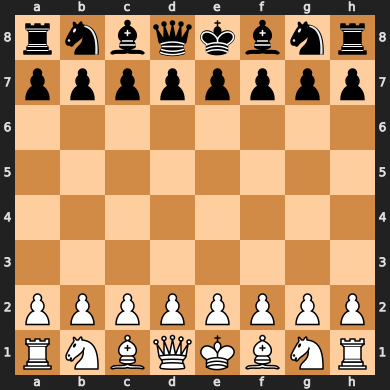

In [64]:
import chess

board = chess.Board()
board

In [65]:
def getPiecesValue(board):
  # Si es jaque mate
  if board.is_checkmate():
        if board.turn:
            return -9999
        else:
            return 9999
  white = board.occupied_co[chess.WHITE]
  black = board.occupied_co[chess.BLACK]
  return (
        1 * (chess.popcount(white & board.pawns) - 
        chess.popcount(black & board.pawns)) +
        3 * (chess.popcount(white & board.knights) - 
             chess.popcount(black & board.knights)) +
        3.5 * (chess.popcount(white & board.bishops) - 
               chess.popcount(black & board.bishops)) +
        5 * (chess.popcount(white & board.rooks) - 
             chess.popcount(black & board.rooks)) +
        9 * (chess.popcount(white & board.queens) - 
             chess.popcount(black & board.queens))
  )

In [68]:
def alphabeta(board, depth, alpha, beta, maximizingPlayer):
    if depth == 0 or board.is_game_over():
        return None, getPiecesValue(board)
    
    if maximizingPlayer:
        bestMove = None
        maxEval = float('-inf')
        for move in board.legal_moves:
            board.push(move)
            _, eval = alphabeta(board, depth - 1, alpha, beta, False)
            board.pop()
            if eval > maxEval:
                maxEval = eval
                bestMove = move
            alpha = max(alpha, eval)
            if beta <= alpha:
                break
        return bestMove, maxEval
    else:
        bestMove = None
        minEval = float('inf')
        for move in board.legal_moves:
            board.push(move)
            _, eval = alphabeta(board, depth - 1, alpha, beta, True)
            board.pop()
            if eval < minEval:
                minEval = eval
                bestMove = move
            beta = min(beta, eval)
            if beta <= alpha:
                break
        return bestMove, minEval


def minimaxAB(board, depth):
  if not board.turn:
    return alphabeta(board, depth, float('-inf'), float('inf'), False)
  else:
    return alphabeta(board, depth, float('-inf'), float('inf'), True)

In [69]:
import time

start_time = time.time()
bestMove, eval = minimaxAB(board, 5)
end_time = time.time()

print("Execution time:", end_time - start_time, "seconds")
print("Best move:", board.san(bestMove), " Eval: ", eval)

Execution time: 0.4382767677307129 seconds
Best move: g3  Eval:  1.0


In [70]:
def minimax(board, depth):
    if depth == 0 or board.is_game_over():
        # If the game ends return heuristic value
        return None, getPiecesValue(board)

    # If it is white turn's we maximize
    if board.turn:
        maxEval = float('-inf')
        bestMove = None
        for move in board.legal_moves:
            board.push(move)
            eval = minimax(board, depth - 1)[1]
            board.pop()
            #Find the maximum value
            if eval > maxEval:
                maxEval = eval
                bestMove = move
        return bestMove, maxEval
    # In black's turn we minimize
    else:
        minEval = float('inf')
        bestMove = None
        for move in board.legal_moves:
            board.push(move)
            eval = minimax(board, depth - 1)[1]
            board.pop()

            #Find the minimum value
            if eval < minEval:
                minEval = eval
                bestMove = move
        return bestMove, minEval

In [71]:
moves = []
cont = 1
time1=[]
time2=[]

# While game doesn't ends
while not board.is_game_over():

  # White move

  # Get move
  start_time = time.time()
  move, eval = minimaxAB(board, 5)
  end_time = time.time()
  
  time1.append(end_time - start_time)

  move = board.san(move)
  # Make move
  board.push_san(move)
  moves.append(move)
  print("---------[",cont,"]---------")
  print("WHITE-------------->" + move)

  # Black move
  if board.is_game_over():
      break;
  
  # Get move
  start_time = time.time()
  move2, eval = minimax(board, 3)
  end_time = time.time()
  
  time2.append(end_time - start_time)
  # Make move
  move2 = board.san(move2)
  board.push_san(move2)
  moves.append(move2)
  print("BLACK-------------->" + move2 + "\n")
  print(board)
  print("\n")
  cont += 1

---------[ 1 ]---------
WHITE-------------->g3
BLACK-------------->Nh6

r n b q k b . r
p p p p p p p p
. . . . . . . n
. . . . . . . .
. . . . . . . .
. . . . . . P .
P P P P P P . P
R N B Q K B N R


---------[ 2 ]---------
WHITE-------------->Nh3
BLACK-------------->Ng4

r n b q k b . r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . n .
. . . . . . P N
P P P P P P . P
R N B Q K B . R


---------[ 3 ]---------
WHITE-------------->Ng1
BLACK-------------->Rg8

r n b q k b r .
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . n .
. . . . . . P .
P P P P P P . P
R N B Q K B N R


---------[ 4 ]---------
WHITE-------------->Nh3
BLACK-------------->Rh8

r n b q k b . r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . n .
. . . . . . P N
P P P P P P . P
R N B Q K B . R


---------[ 5 ]---------
WHITE-------------->Ng1
BLACK-------------->Rg8

r n b q k b r .
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . n .
. . . . . . P .
P P P P P P . P
R N 

In [74]:
res = ""
aux = True
cont = 1
for i in range(0, len(moves)):
  if aux:
    res += str(cont) + ". " + moves[i] + " "
    aux = False
  else:
    res += moves[i] + " "
    aux = True
    cont = cont + 1


print(str(res))

1. g3 Nh6 2. Nh3 Ng4 3. Ng1 Rg8 4. Nh3 Rh8 5. Ng1 Rg8 6. Nh3 Rh8 7. Ng1 Rg8 8. Nh3 Rh8 9. Ng1 Rg8 10. Nh3 Rh8 11. Bg2 Na6 12. Ng5 Rb8 13. Ne4 Rg8 14. Ng5 Rh8 15. Ne4 Rg8 16. Ng5 Rh8 17. Ne4 Rg8 18. Ng5 Rh8 19. Ne4 Rg8 20. Nec3 Ra8 21. Nd5 Rh8 22. Nf4 Rg8 23. Nh5 Rh8 24. Nf4 Rg8 25. Nh5 Rh8 26. Nf4 Rg8 27. Nh5 Rh8 28. Nf4 Rg8 29. Nh5 Rb8 30. Bd5 Rh8 31. Nf4 Rg8 32. Be4 Rh8 33. Nh5 Ra8 34. Nf4 Rb8 35. Nh5 Ra8 36. Nf4 Rb8 37. Nh5 Ra8 38. Nf4 Rb8 39. Nh5 Ra8 40. Bf5 Nh6 41. Bh3 Nb4 42. Nf4 Rg8 43. Nh5 Rh8 44. Nf4 Rg8 45. Nh5 Rh8 46. Nf4 Rg8 47. Nh5 Rh8 48. Nf4 Rg8 49. Nd3 Nc6 50. Bg2 Nd4 51. e3 Ndf5 52. Qh5 Rh8 53. Qg5 Rg8 54. Be4 Rh8 55. Bxf5 Nxf5 56. Qxf5 Rb8 57. Ne5 f6 58. Qh5+ g6 59. Nxg6 Rg8 60. Nh8+ Rg6 61. Qxh7 Rg7 62. Qh5+ Rf7 63. Qxf7# 


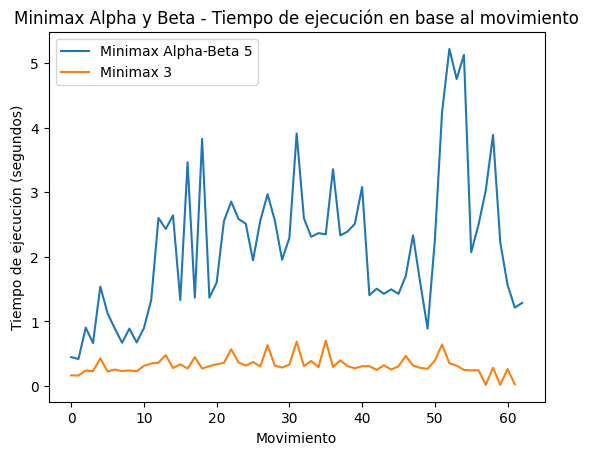

In [75]:
import matplotlib.pyplot as plt

plt.plot(time1, label='Minimax Alpha-Beta 5')
plt.plot(time2, label='Minimax 3')

plt.xlabel('Movimiento')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Minimax Alpha y Beta - Tiempo de ejecución en base al movimiento')

plt.legend()
plt.show()